('x_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 342us/step - loss: 0.7861 - acc: 0.7629 - mean_squared_error: 0.0337 - val_loss: 0.2507 - val_acc: 0.9273 - val_mean_squared_error: 0.0114
Epoch 2/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.2253 - acc: 0.9326 - mean_squared_error: 0.0103 - val_loss: 0.1835 - val_acc: 0.9427 - val_mean_squared_error: 0.0086
Epoch 3/12
60000/60000 [==============================] - 20s 332us/step - loss: 0.1748 - acc: 0.9474 - mean_squared_error: 0.0080 - val_loss: 0.1465 - val_acc: 0.9550 - val_mean_squared_error: 0.0069
Epoch 4/12
60000/60000 [==============================] - 20s 333us/step - loss: 0.1473 - acc: 0.9553 - mean_squared_error: 0.0068 - val_loss: 0.1298 - val_acc: 0.9596 - val_mean_squared_error: 0.0061
Epoch 5/12
60000/60000 [==============================] - 

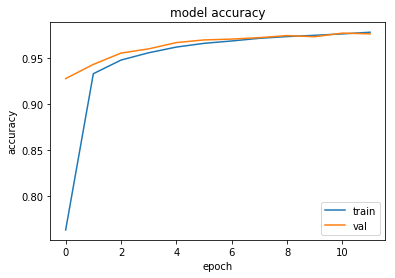

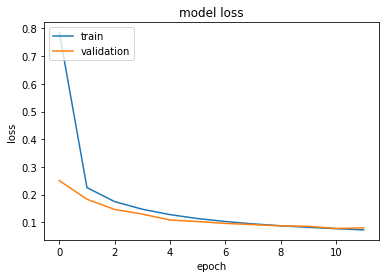

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from matplotlib import pyplot as plt


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#added by Shraddha - Prepared the data using some processing on the images like resizing images, normalizing the pixel values etc.
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# Added by Shraddha - After doing the necessary processing on the image information, the label data 
# i.e. y_train and y_test is converted into categorical formats like label ‘3’ is converted to a vector [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] for model building.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Added by shraddha - 
# The architecture followed here is 2 convolution layers each followed by pooling layer, a fully connected layer and softmax layer respectively.
# Multiple filters are used at each convolution layer, for different types of feature extraction
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

# https://keras.io/optimizers/ 
# Added by Shraddha - the model is compiled using categorical_crossentropy loss function
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(lr=0.1, rho=0.95, epsilon=None, decay=0.0),
              metrics=['accuracy', 'mse'])

# Added by Shraddha - model is fitted using X_train and y_train and then evaluated in terms of performance.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# print(history.history.keys())

# Added by Shraddha- Plot the accuracy and error of both the testing and training data
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()